# IPL Data Analysis Project
## Project Description

This project focuses on exploratory data analysis (EDA) of the Indian Premier League (IPL) dataset using Python in a Jupyter Notebook environment. The objective is to analyze historical IPL match data to uncover patterns, trends, and insights related to team performance, match outcomes, venues, and seasons.

The dataset contains match-level information such as teams involved, match results, venues, seasons, and other relevant attributes. Using Python libraries like Pandas, NumPy, Matplotlib, and Seaborn, the data is cleaned, processed, and visualized to support data-driven conclusions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")   


In [2]:
ipl=pd.read_csv('IPL.csv')

In [3]:
ipl.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [5]:
ipl.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [6]:
ipl.shape

(74, 20)

In [7]:
ipl.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


1. Which Team won the most match?


Text(0, 0.5, 'Teams')

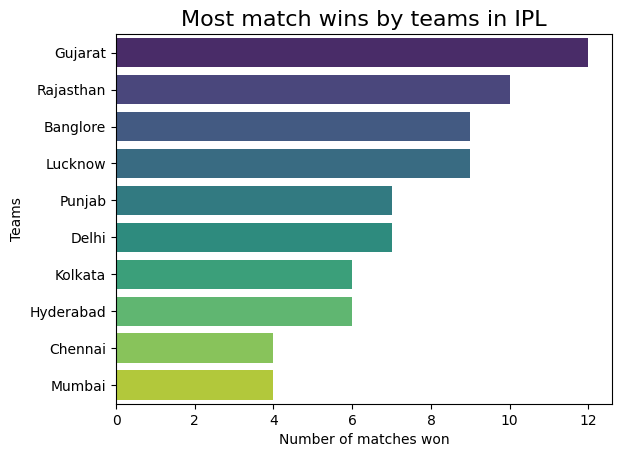

In [8]:
match_win=ipl['match_winner'].value_counts()
sns.barplot(y = match_win.index,x = match_win.values,palette='viridis')
plt.title('Most match wins by teams in IPL',fontsize=16)
plt.xlabel('Number of matches won')
plt.ylabel('Teams')

2.Toss Decision Trend

Text(0.5, 1.0, 'Toss decision in IPL')

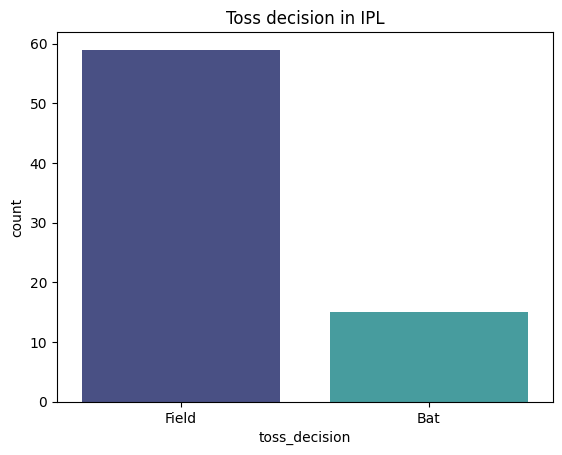

In [9]:
sns.countplot(x=ipl['toss_decision'],palette='mako')
plt.title('Toss decision in IPL')

3.Toss Winners vs Match Winners

In [10]:
count=ipl[ipl['toss_winner'] == ipl['match_winner']]['match_id'].count()
precenatge = (count*100)/ipl.shape[0]
precenatge.round(2)

np.float64(48.65)

4.How do Teams Win?(Run Vs Wickets)

Text(0.5, 1.0, 'Match won by runs or wickets')

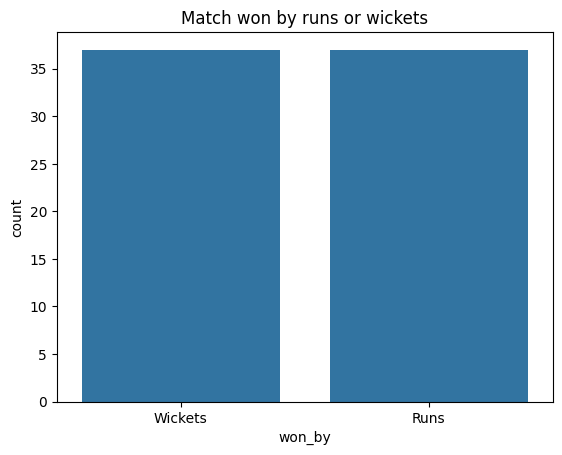

In [11]:
sns.countplot(x=ipl['won_by'])
plt.title('Match won by runs or wickets')

## Key Player Performanes

1.most "player of the match" Awards

In [12]:
count=ipl['player_of_the_match'].value_counts().head(10)

Text(0, 0.5, 'Players')

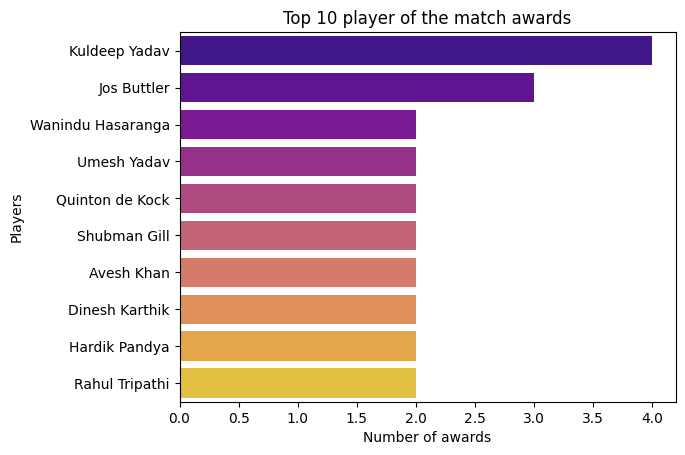

In [13]:
sns.barplot(y=count.index,x=count.values,palette='plasma')
plt.title('Top 10 player of the match awards')
plt.xlabel('Number of awards')
plt.ylabel('Players')

2.Top Scorers

In [14]:
high=ipl.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

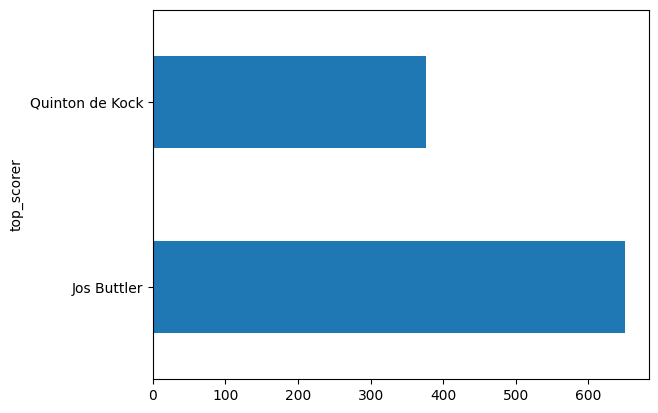

In [15]:
high.plot(kind="barh")

In [16]:
ipl.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


10 best bowling figures

In [17]:
ipl['highest_wc']=ipl['best_bowling_figure'].apply(lambda x :x.split("--")[0])


In [18]:
ipl['highest_wc']=ipl['highest_wc'].astype(int)

<Axes: ylabel='best_bowling'>

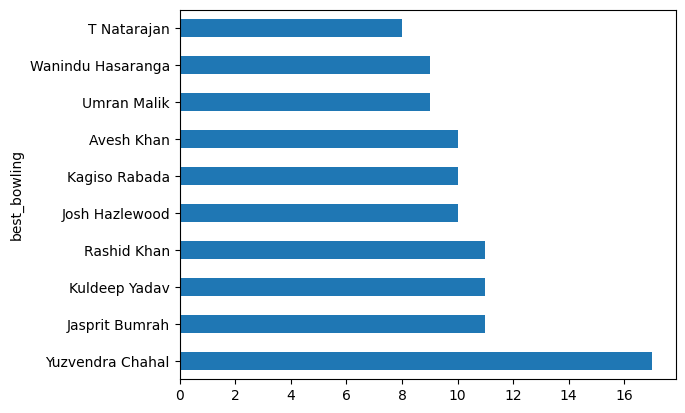

In [19]:
top_bowlers = ipl.groupby('best_bowling')['highest_wc'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh')

## Venue Analysis

Most Matches Played by Venue

In [20]:
venue_count=ipl['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

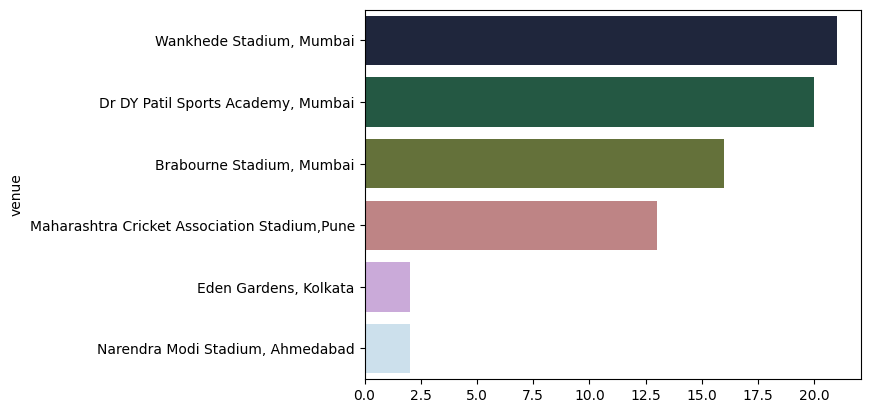

In [21]:
sns.barplot(y=venue_count.index,x=venue_count.values,palette='cubehelix')

Who won the highest  margin by runs?


In [26]:
ipl[ipl['won_by'] =='Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Which Player had the highest individual score?

In [28]:
ipl[ipl['highscore']==ipl['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Which Bowler had the best figure?


In [33]:
ipl.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wc
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [35]:
ipl[ipl['highest_wc']==ipl['highest_wc'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
